## 空间数据可视化
python版本：3.7

核心第三方包：[geopandas](http://geopandas.org/) & [contextily](https://github.com/darribas/contextily)

数据：

- [shan3xi.json](data/shan3xi.json)：陕西省行政区划geojson格式文件
- [pois.txt](data/pois.txt): 陕西省内旅游景点数据，有噪音，坐标系4326 (经度字段：lng，维度字段：lat)


%matplotlib inline 用于使用matplotlib在该页面内绘制图表

In [1]:
%matplotlib inline

### Geopandas读取GeoJson并绘制

In [2]:
import geopandas as gpd

In [3]:
fp = "./data/shan3xi.json"

In [4]:
shaanxi = gpd.read_file(fp)

In [5]:
type(shaanxi)

geopandas.geodataframe.GeoDataFrame

In [6]:
shaanxi.head()

,id,name,childNum,geometry
0,6108,榆林市,12,"POLYGON ((110.929 38.7158, 110.885 38.6224, 11..."
1,6106,延安市,13,"POLYGON ((110.4236 36.9745, 110.4236 36.9525, ..."
2,6107,汉中市,11,"POLYGON ((106.5784 33.5852, 106.6003 33.5797, ..."
3,6109,安康市,10,"POLYGON ((108.0505 33.7115, 108.0835 33.728, 1..."
4,6110,商洛市,7,"POLYGON ((108.8416 33.8159, 108.8965 33.8379, ..."


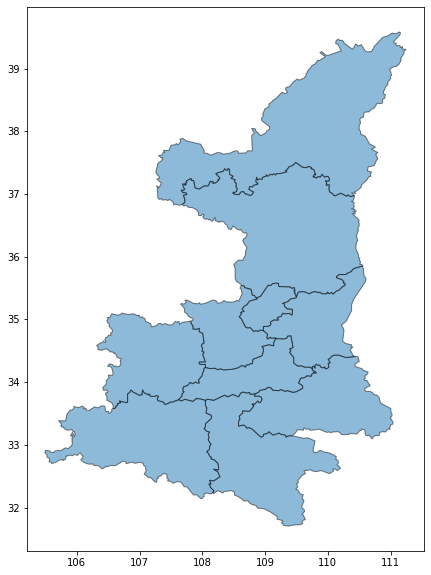

In [7]:
ax = shaanxi.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

### Pandas读取CSV文件，添加几何信息，转换为GeoPandas GeoDataFrame 并去除噪音

In [8]:
import pandas as pd

In [9]:
from shapely.geometry import Point

In [10]:
pois = pd.read_csv("./data/pois.txt")

In [11]:
pois.head()

,name,city,label_id,address,imgsUrl,score,averagePrice,lat,lng
0,西安金龙峡风景区【智游陕西】,1,"[""自然生态""]",户县石井镇蔡家坡,http://zxwpic.weiyoutong.com/1f03e1f4-4e6e-442...,4.3,50.0,34.020400,108.637178
1,西安莲花山森林公园【智游陕西】,1,"[""自然生态""]",蓝田县蓝桥镇玉山景区,http://zxwpic.weiyoutong.com/534f9510-e40f-43d...,4.3,20.0,34.204112,109.512706
2,秦岭九龙潭景区【智游陕西】,1,"[""自然生态""]",长安区喂子坪210国道43公里处,http://zxwpic.weiyoutong.com/6ef572cc-4303-4bd...,4.0,20.0,NaN,NaN
3,西安世博园【智游陕西】,1,"[""都市玩乐""]",浐灞生态区浐灞大道1号,http://zxwpic.weiyoutong.com/96a08437-8275-4b1...,4.3,45.0,34.318484,109.045126
4,广仁寺【智游陕西】,1,"[""宗教寺院""]",莲湖区广仁寺路1号,http://zxwpic.weiyoutong.com/092be914-8962-4a9...,4.6,15.0,34.274355,108.926249


In [12]:
pois["geometry"]=pois.apply(lambda z:Point(z.lng,z.lat),axis=1)

In [13]:
pois = gpd.GeoDataFrame(
    pois, crs  ={'init': 'epsg:4326'}
)

In [14]:
pois.head()

,name,city,label_id,address,imgsUrl,score,averagePrice,lat,lng,geometry
0,西安金龙峡风景区【智游陕西】,1,"[""自然生态""]",户县石井镇蔡家坡,http://zxwpic.weiyoutong.com/1f03e1f4-4e6e-442...,4.3,50.0,34.020400,108.637178,POINT (108.6371776 34.0204003)
1,西安莲花山森林公园【智游陕西】,1,"[""自然生态""]",蓝田县蓝桥镇玉山景区,http://zxwpic.weiyoutong.com/534f9510-e40f-43d...,4.3,20.0,34.204112,109.512706,POINT (109.512706 34.20411199999999)
2,秦岭九龙潭景区【智游陕西】,1,"[""自然生态""]",长安区喂子坪210国道43公里处,http://zxwpic.weiyoutong.com/6ef572cc-4303-4bd...,4.0,20.0,NaN,NaN,POINT (nan nan)
3,西安世博园【智游陕西】,1,"[""都市玩乐""]",浐灞生态区浐灞大道1号,http://zxwpic.weiyoutong.com/96a08437-8275-4b1...,4.3,45.0,34.318484,109.045126,POINT (109.045126 34.31848400000001)
4,广仁寺【智游陕西】,1,"[""宗教寺院""]",莲湖区广仁寺路1号,http://zxwpic.weiyoutong.com/092be914-8962-4a9...,4.6,15.0,34.274355,108.926249,POINT (108.9262492 34.2743555)


In [15]:
xmin, xmax, ymin, ymax = ax.axis()
xmin, xmax, ymin, ymax

(105.20285500000001, 111.53544500000002, 31.31264, 39.97756)

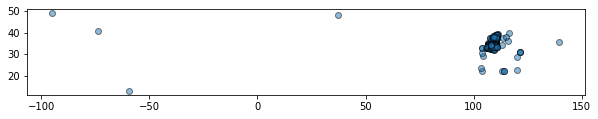

In [16]:
pois.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [17]:
pois=pois.loc[(pois.lng>xmin)&(pois.lng<xmax)&(pois.lat>ymin)&(pois.lat<ymax)]

In [18]:
pois.head()

,name,city,label_id,address,imgsUrl,score,averagePrice,lat,lng,geometry
0,西安金龙峡风景区【智游陕西】,1,"[""自然生态""]",户县石井镇蔡家坡,http://zxwpic.weiyoutong.com/1f03e1f4-4e6e-442...,4.3,50.0,34.020400,108.637178,POINT (108.6371776 34.0204003)
1,西安莲花山森林公园【智游陕西】,1,"[""自然生态""]",蓝田县蓝桥镇玉山景区,http://zxwpic.weiyoutong.com/534f9510-e40f-43d...,4.3,20.0,34.204112,109.512706,POINT (109.512706 34.20411199999999)
3,西安世博园【智游陕西】,1,"[""都市玩乐""]",浐灞生态区浐灞大道1号,http://zxwpic.weiyoutong.com/96a08437-8275-4b1...,4.3,45.0,34.318484,109.045126,POINT (109.045126 34.31848400000001)
4,广仁寺【智游陕西】,1,"[""宗教寺院""]",莲湖区广仁寺路1号,http://zxwpic.weiyoutong.com/092be914-8962-4a9...,4.6,15.0,34.274355,108.926249,POINT (108.9262492 34.2743555)
5,户县九华山阿姑泉牡丹苑【智游陕西】,1,"[""自然生态""]",户县石井镇阿姑泉村,http://zxwpic.weiyoutong.com/e6f67449-aabf-435...,4.6,28.0,34.020984,108.626259,POINT (108.626259 34.02098400000001)


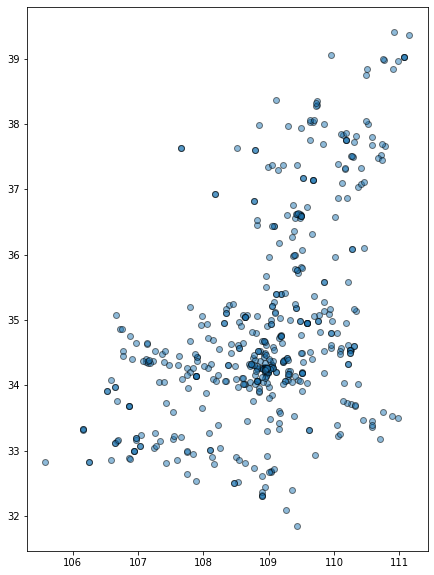

In [19]:
pois.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

### 绘制空间数据并添加底图（epsg=3857）
注：底图空间参考为web墨卡托，获取底图可能会有点慢

In [20]:
import contextily as ctx

In [21]:
def add_basemap(ax, zoom, url):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(
        xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    ax.axis((xmin, xmax, ymin, ymax))

C:\Users\ThinkPad\Anaconda3\envs\gis3x\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


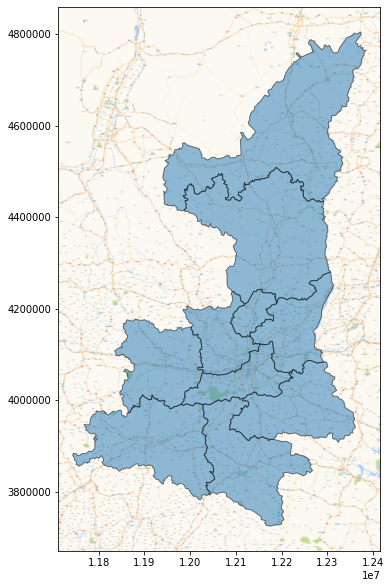

In [22]:
ax = shaanxi.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10,url="http://webrd02.is.autonavi.com/appmaptile?x={x}&y={y}&z={z}&lang=zh_cn&size=1&scale=1&style=8")

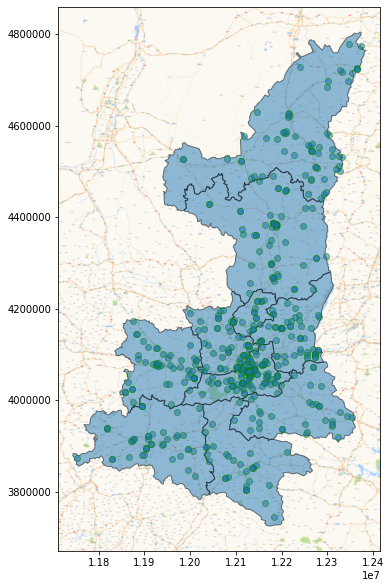

In [23]:
ax = shaanxi.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
pois.to_crs(epsg=3857).plot(ax=ax, alpha=0.5,edgecolor='green')
add_basemap(ax, zoom=10,url="http://webrd01.is.autonavi.com/appmaptile?x={x}&y={y}&z={z}&lang=zh_cn&size=1&scale=1&style=8")